# Measuring exploitation-exploration behaviour of neighbourhood operators

The transition matrix $p_{i,j}$ gives the probability of a transition from point $i$ to point $j$ in a single application of the neighbourhood operator. We can define several interesting quantities in terms of this matrix.

For any point $i$, other points $j$ are *near to* $i$ to the extent that $p_{i,j}$ is large. We can define $d(i, j) = -log(p_{i,j})$ as a distance (not a true metric) between points. This distance does not take syntactic, semantic, or any other type of *similarity* between $i$ and $j$ into account: it expresses only their *proximity* as measured by one-step transition probabilities.

We can define a binary relation, *neighbourhood*: point $j$ is a neighbour of point $i$ if $p_{i,j} \neq 0$.

We wish to quantify the idea that some operators are more exploitative, others more explorative. We will give a definition for *exploitativeness*: high values will indicate an exploitative operator, while low values will indicate an explorative operator. The main idea is *peakedness within each row of the transition matrix*. If the row $p_{i,\cdot}$ corresponding to transitions outward from point $i$ is strongly peaked, that indicates that if we are currently at point $i$, then the next point in the search is highly likely to come from just one of a few points $j$ with high $p_{i,j}$. These are the neighbours of $i$ (or the nearest neighbours of $i$, in terms of $d$). In contrast, if the row is not strongly peaked, that indicates that the next point in the search could come from almost anywhere in the space. In an extreme case, a row might be entirely flat, in which case there is no bias towards any point, and the search reduces to random search.

We quantify peakedness in a single row using the coefficient of variation (CV), defined as $CV(x) = SD(x)/M(x)$ where $SD$ is the standard deviation and $M$ the mean of a vector $x$. The SD alone represents peakedness, but CV does so in a scale-independent way.

We can then quantify the exploitativeness of an operator as the mean of the CV across rows, $\frac{\sum_{i=0}^{N-1} CV(p_{i,\cdot})}{N}$. As already stated, high values indicate an exploitative operator, while low values indicate an explorative operator.



# Calculation and properties of *exploitativeness*

In the following, we use $N$ to indicate the size of the space.  

The mean transition probability is $1/N$, where $N$ is the size of the space, since transition probabilities in a single row must sum to 1.

## A common special case

For some operators, every point $i$ has the same number of neighbours $m$, and all have an equal transition probability $1/m$. In this common special case, the value of exploitativeness can be calculated as follows. Recall that SD is defined as $$\frac{\sum (x_i - \mu(x))^2}{N}$$ where $x_i$ are the items for $i=1\ldots N$ and $\mu$ indicates the mean. The numerator is a sum of squared differences. In our case there are $m$ neighbours, each of transition probability $p=1/m$. There are $N-m$ non-neighbours, each of transition probability 0. The mean transition probability is $1/N$. The sum of squared differences is thus $$ssq = m(1/m - 1/N)^2 + (N-m)(0 - 1/N)^2$$ Then the variance $v = ssq/N$, and $SD =\sqrt{v}$, and finally $CV =N \cdot SD$. Since all rows will give equal CV, this is the value for exploitativeness of such an operator: $$N \sqrt{\frac{m \left(\frac{1}{m} - \frac{1}{N}\right)^{2} + \frac{1}{N^{2}} \left(N - m\right)}{N}}$$

This simplifies to: $$\sqrt{\frac{1}{m} \left(N - m\right)}$$

### Example: bitstrings of length $n$

In the space of bitstrings of length $n$, the size of the space $N=2^n$. Using a per-individual mutation operator (ie we carry out one bit-flip per mutation event),
we have $m=n$. Exploitativeness is equal to $$\sqrt{\frac{1}{n} \left(2^{n} - n\right)}$$



FIXME check operator precedence above!

In [218]:
from sympy import symbols, Symbol, simplify, latex
from sympy import binomial, sqrt, factorial, Sum
import math
import os.path
import matplotlib.pyplot as plt
import scipy.misc
%matplotlib inline
from sympy.interactive import printing
printing.init_printing(use_latex=True)
nCk = lambda n, k: scipy.misc.comb(n, k, True)

In [267]:
n = Symbol('n', integer=True, positive=True) # a parameter specifying size of representation
N = Symbol('N', integer=True, positive=True) # size of space
m = Symbol('m', integer=True) # number of neighbours (special cases)
h = Symbol("h", integer=True) # Hamming distance
p = Symbol("p", integer=False) # per-gene mutation probability

N_b = 2**n
N_p = factorial(n-1)
# N_t = ? # trees

In [268]:
ssqd = m * (1/m - 1/N)**2 + (N-m) * (0 - 1/N)**2

CV_with_m_equal_neighbours = N * sqrt(ssqd / N)
CV_with_m_equal_neighbours_simp = simplify(CV_with_m_equal_neighbours)
print("CV with m equal neighbours")
print(CV_with_m_equal_neighbours)
print(latex(CV_with_m_equal_neighbours))

print("CV with m equal neighbours, simplified")
print(CV_with_m_equal_neighbours_simp)
print(latex(CV_with_m_equal_neighbours_simp))
      
CV_bitstring_per_ind = CV_with_m_equal_neighbours_simp.subs([(N, 2**n), (m, n)])
print("CV for bitstrings with per-individual bit-flip")
print(CV_bitstring_per_ind)
print(latex(CV_bitstring_per_ind))
    
CV_permutation_swap_adj = CV_with_m_equal_neighbours_simp.subs([(N, factorial(n-1)), (m, n)])
print("CV for permutations with swap-adjacent")
print(CV_permutation_swap_adj)
print(latex(CV_permutation_swap_adj))

                                                                

CV with m equal neighbours
sqrt(N)*sqrt(m*(1/m - 1/N)**2 + (N - m)/N**2)
\sqrt{N} \sqrt{m \left(\frac{1}{m} - \frac{1}{N}\right)^{2} + \frac{1}{N^{2}} \left(N - m\right)}
CV with m equal neighbours, simplified
sqrt((N - m)/m)
\sqrt{\frac{1}{m} \left(N - m\right)}
CV for bitstrings with per-individual bit-flip
sqrt(2**n - n)/sqrt(n)
\frac{1}{\sqrt{n}} \sqrt{2^{n} - n}
CV for permutations with swap-adjacent
sqrt(-n + factorial(n - 1))/sqrt(n)
\frac{1}{\sqrt{n}} \sqrt{- n + \left(n - 1\right)!}


CV with m equal neighbours
```N*sqrt((m*(1/m - 1/N)**2 + (N - m)/N**2)/N)```
$$N \sqrt{\frac{1}{N} \left(m \left(\frac{1}{m} - \frac{1}{N}\right)^{2} + \frac{1}{N^{2}} \left(N - m\right)\right)}$$

CV with m equal neighbours, simplified
$$\frac{N}{\left\lvert{N}\right\rvert} \sqrt{\frac{1}{m} \left(N - m\right)}$$

CV for bitstrings with per-individual bit-flip
```sqrt((2**n - n)/n))```

$$\sqrt{\frac{1}{n} \left(2^{n} - n\right)}$$

CV for permutations with swap-adjacent
```sqrt((-n + factorial(n - 1))/n)*factorial(n - 1)/Abs(factorial(n - 1)))```

$$\frac{\left(n - 1\right)!}{\left\lvert{\left(n - 1\right)!}\right\rvert} \sqrt{\frac{1}{n} \left(- n + \left(n - 1\right)!\right)}$$


In [244]:
def plot_cv(x, cv, filename):
    fig, ax = plt.subplots(figsize=(4, 2.5))
    ax.plot(x, cv)
    plt.xlabel("$n$")
    plt.ylabel("CV")
    plt.subplots_adjust(left=0.2, bottom=0.2)
    plt.savefig(os.path.join(basedir, filename))
    del ax
    del fig

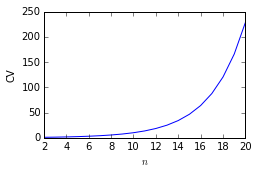

In [273]:
x = range(2, 21)
basedir = "/Users/jmmcd/Dropbox/GPDistance/results/space_bitstring/"
plot_cv(x, [CV_bitstring_per_ind.subs(n, i).evalf() for i in x], "per_ind_cv.pdf")

### Example: bitstrings of length $n$ with a per-gene mutation probability

In this case, all points in the space are neighbours, with differing transition probabilties, so the previous special case cannot be used. With per-gene mutation probability $p$, the transition probability to an individual whose Hamming distance is $h$ is $$p^h (1 - p)^{n - h}$$

How many individuals are there at Hamming distance $h$? For $h=0$, there are 1. For $h=1$, there are $n$. For $h=2$, there are $\binom{n}{2}$. In general, there are $\binom{n}{h}$

As in the per-individual mutation above, the mean value of $t$ is $1/2^n$. So the variance $$v = \frac{\sum_{h=0}^n \left(\binom{n}{h} (p^h (1-p)^{n-h}) - 1/2^n \right)^2}{2^n}$$

Again $SD = \sqrt{v}$ and $CV = N\cdot SD$.

In [246]:
def test():
    n = 10
    p = 0.001
    N = 2**n
    sigma_f = math.sqrt(
        sum(
            nCk(n, h) * # number of individuals at Hamming distance h
            (p**h * (1.0-p)**(n-h) # transition probability for each individual
             - 
             1.0/N # mean transition probability
            )**2 # squared difference
            for h in range(n+1) # [0, 1, ... n]
            ) / N # variance
        ) # stddev
    coefvar_f = N * sigma_f
    return sigma_f, coefvar_f
print test()

(0.030923641528236703, 31.665808924914383)


In [247]:
CV_bitstring_per_gene = N * sqrt(Sum(binomial(n, h) * ((p**h * (1-p)**(n-h)) - 1/2**n)**2,
                                     (h, 0, n))/N)
print("CV_bitstring_per_gene")
print(CV_bitstring_per_gene)
print(latex(CV_bitstring_per_gene))
print("CV_bitstring_per_gene with n=10 and p=0.001")
print(CV_bitstring_per_gene.subs([(N, 2**n), (n, 10), (p, 0.001)]).evalf())

CV_bitstring_per_gene
sqrt(N)*sqrt(Sum((p**h*(-p + 1)**(-h + n) - 2**(-n))**2*binomial(n, h), (h, 0, n)))
\sqrt{N} \sqrt{\sum_{h=0}^{n} \left(p^{h} \left(- p + 1\right)^{- h + n} - 2^{- n}\right)^{2} {\binom{n}{h}}}
CV_bitstring_per_gene with n=10 and p=0.001
31.6658089249144


$$N \sqrt{\frac{\sum_{h=0}^{n} {\binom{n}{h}} \left(p^{h} \left(1-p \right)^{n - h} - \frac{1}{2^n}\right)^{2}}{N}}$$

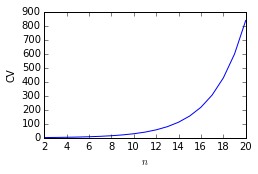

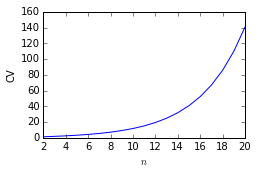

In [274]:
x = range(2, 21)
basedir = "/Users/jmmcd/Dropbox/GPDistance/results/space_bitstring/"
plot_cv(x, [CV_bitstring_per_gene.subs([(N, 2**n), (p, 0.01), (n, i)]).evalf() for i in x], "per_gene_0.010_cv.pdf")
plot_cv(x, [CV_bitstring_per_gene.subs([(N, 2**n), (p, 0.10), (n, i)]).evalf() for i in x], "per_gene_0.100_cv.pdf")

### Example: permutations of length $n$

In a space of permutations of length $n$, $N=n!/n = (n-1)!$.

With the swap-adjacent operator, there are $m=n$ neighbours of equal transition probability $p=1/m$, so we again use the expression for $m$ neighbours of probability $1/m$. The expression for CV comes out to be
$$\frac{1}{\sqrt{n}} \sqrt{- n + \left(n - 1\right)!}$$

Swap-adjacent has $m=n$, all equal.

Swap-two has $m=n(n-1)/2$, all equal.

Two-opt has $m=n(n-3)/2$, all equal.

Three-opt has $m=4 n (n-4) (n-5) / 6$, all equal.

Three-opt-broad has $4n(n-4)(n-5)/6 < m < 7n(n-4)(n-5)/6$ -- not all equal -- three different possible values, which I don't yet understand.

Twoh-opt has $m = n(n-2)-n = n(n-3)$. We have $n(n-4)$ neighbours where $p=\frac{1}{n(n-2)}$, and $n$ neighbours where $p=\frac{2}{n(n-2)}$. This happens because we "expect" $m=n(n-2)$ by inspection of the method, each with $p=n$, but $n$ of the neighbours occur twice (getting twice the probability), reducing the number of neighbours to $n(n-2)-n$.

In [269]:
CV_permutation_swap_adj = CV_with_m_equal_neighbours_simp.subs([(N, factorial(n-1)), (m, n)])
print("CV for permutations with swap-adjacent operator")
print(CV_permutation_swap_adj)
print(latex(CV_permutation_swap_adj))
print("CV_permutation_swap_adj with n=10")
print(CV_permutation_swap_adj.subs(n, 10).evalf())

CV for permutations with swap-adjacent operator
sqrt(-n + factorial(n - 1))/sqrt(n)
\frac{1}{\sqrt{n}} \sqrt{- n + \left(n - 1\right)!}
CV_permutation_swap_adj with n=10
190.491469625283


In [282]:
mean_p = 1/N
ssqd = n*(n-4)*(1/(n*(n-2)) - mean_p)**2 + n*(2/(n*(n-2)) - mean_p)**2
CV_permutation_twoh_opt = (N * sqrt(ssqd / N)).subs(N, factorial(n-1))
print("CV for permutations with twoh-opt operator")
print(CV_permutation_twoh_opt)
print(latex(CV_permutation_twoh_opt))
print("Simplified")
CV_permutation_twoh_opt_simp = simplify(CV_permutation_twoh_opt)
print(CV_permutation_twoh_opt_simp)
print(latex(CV_permutation_twoh_opt_simp))
print("CV_permutation_twoh_opt with n=10")
print(CV_permutation_twoh_opt.subs(n, 10).evalf())

CV for permutations with twoh-opt operator
sqrt(n*(n - 4)*(-1/factorial(n - 1) + 1/(n*(n - 2)))**2 + n*(-1/factorial(n - 1) + 2/(n*(n - 2)))**2)*sqrt(factorial(n - 1))
\sqrt{n \left(n - 4\right) \left(- \frac{1}{\left(n - 1\right)!} + \frac{1}{n \left(n - 2\right)}\right)^{2} + n \left(- \frac{1}{\left(n - 1\right)!} + \frac{2}{n \left(n - 2\right)}\right)^{2}} \sqrt{\left(n - 1\right)!}
Simplified
sqrt(n**6 - 7*n**5 + 16*n**4 - 2*n**3*factorial(n) - 12*n**3 + 8*n**2*factorial(n) - 8*n*factorial(n) + (factorial(n))**2)/(sqrt(n)*Abs(n - 2)*sqrt(factorial(n)))
\frac{1}{\sqrt{n} \left\lvert{n - 2}\right\rvert \sqrt{n!}} \sqrt{n^{6} - 7 n^{5} + 16 n^{4} - 2 n^{3} n! - 12 n^{3} + 8 n^{2} n! - 8 n n! + n!^{2}}
CV_permutation_twoh_opt with n=10
75.2861221799957


### Permutation twoh-opt

My version:

$$(n-1)! \sqrt{\frac{n \left(n - 4\right) \left(\frac{1}{n \left(n - 2\right)} - \frac{1}{\left(n - 1\right)!}\right)^{2} + n \left(\frac{2}{n \left(n - 2\right)} - \frac{1}{\left(n - 1\right)!}\right)^{2}}{\left(n - 1\right)!}}$$

Sympy gives:
$$\sqrt{n \left(n - 4\right) \left(- \frac{1}{\left(n - 1\right)!} + \frac{1}{n \left(n - 2\right)}\right)^{2} + n \left(- \frac{1}{\left(n - 1\right)!} + \frac{2}{n \left(n - 2\right)}\right)^{2}} \sqrt{\left(n - 1\right)!}$$

Simplifies to:
$$\frac{1}{\sqrt{n} \left\lvert{n - 2}\right\rvert \sqrt{n!}} \sqrt{n^{6} - 7 n^{5} + 16 n^{4} - 2 n^{3} n! - 12 n^{3} + 8 n^{2} n! - 8 n n! + n!^{2}}$$

swap_adj
swap_two
two_opt
three_opt
twoh_opt


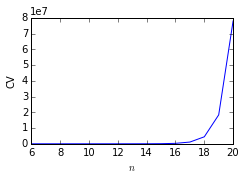

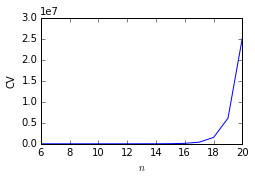

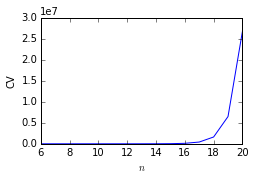

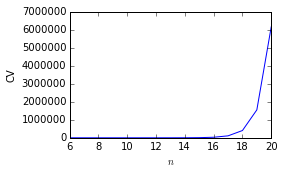

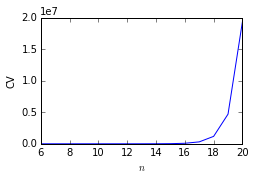

In [284]:
basedir = "/Users/jmmcd/Dropbox/GPDistance/results/space_permutation/"
ops_mvals = [
    ("swap_adj", n),
    ("swap_two", n*(n-1)/2),
    ("two_opt", n*(n-3)/2),
    ("three_opt", 4*n*(n-4)*(n-5)/6),
    ]
x = range(6, 21)
for op, mval in ops_mvals:
    print op
    plot_cv(x, [CV_with_m_equal_neighbours_simp.subs(
                [(N, factorial(n-1)), (m, mval), (n, i)]).evalf() for i in x], 
            op+"_cv.pdf")
print "twoh_opt"
plot_cv(x, [CV_permutation_twoh_opt.subs(n, i).evalf() for i in x], 
            "twoh_opt_cv.pdf")

In [276]:
def test2():
    n = 9
    print 4*n*(n-4)*(n-5)/6.0
test2()

120.0
